In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv(r"C:\Users\17634\Desktop\05-机器学习\02-机器学习代码\chapter14\data\train.csv")
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_image = train.iloc[:, 1:]
train_label = train.iloc[:, 0]

(-0.5, 27.5, 27.5, -0.5)

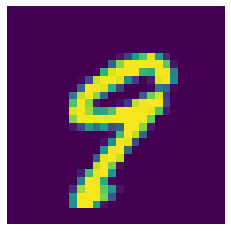

In [11]:
# 查看具体图像
num = train_image.iloc[11].values.reshape(28, 28)
plt.imshow(num)
plt.axis('off')

In [15]:
# 对数据特征值归一化处理
train_image = train_image.values / 255
train_label = train_label.values

x_train, x_val, y_train, y_val = train_test_split(train_image, train_label, train_size = 0.8, random_state=0)



In [16]:
# 特征降维和模型训练

import time
from sklearn.decomposition import PCA

# 多次使用pca,确定最后的最优模型

def n_components_analysis(n, x_train, y_train, x_val, y_val):
    # 记录开始时间
    start = time.time()

    # pca降维实现
    pca = PCA(n_components=n)
    print("特征降维,传递的参数为:{}".format(n))
    pca.fit(x_train)

    # 在训练集和测试集进行降维
    x_train_pca = pca.transform(x_train)
    x_val_pca = pca.transform(x_val)

    # 利用svc进行训练
    print("开始使用svc进行训练")
    ss = svm.SVC()
    ss.fit(x_train_pca, y_train)

    # 获取accuracy结果
    accuracy = ss.score(x_val_pca, y_val)

    # 记录结束时间
    end = time.time()
    print("准确率是:{}, 消耗时间是:{}s".format(accuracy, int(end-start)))

    return accuracy

In [17]:
# 传递多个n_components,寻找合理的n_components:

n_s = np.linspace(0.70, 0.85, num=5)
accuracy = []

for n in n_s:
    tmp = n_components_analysis(n, x_train, y_train, x_val, y_val)
    accuracy.append(tmp)

特征降维,传递的参数为:0.7
开始使用svc进行训练
准确率是:0.9761904761904762, 消耗时间是:18s
特征降维,传递的参数为:0.7374999999999999
开始使用svc进行训练
准确率是:0.9779761904761904, 消耗时间是:18s
特征降维,传递的参数为:0.7749999999999999
开始使用svc进行训练
准确率是:0.9783333333333334, 消耗时间是:19s
特征降维,传递的参数为:0.8125
开始使用svc进行训练
准确率是:0.9798809523809524, 消耗时间是:22s
特征降维,传递的参数为:0.85
开始使用svc进行训练
准确率是:0.9803571428571428, 消耗时间是:24s


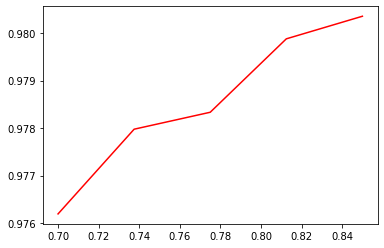

In [18]:
# 准确率可视化展示
plt.plot(n_s, np.array(accuracy), "r")
plt.show()